In [1]:
pip -V


pip 19.3.1 from /QOpenSys/pkgs/lib/python3.6/site-packages/pip (python 3.6)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pixiedust

     |############################### | 194kB 4.2MB/s eta 0:00:01     |################################| 204kB 4.2MB/s 
     |################################| 798kB 827kB/s eta 0:00:01     |##                              | 51kB 418kB/s eta 0:00:02     |######                          | 163kB 827kB/s eta 0:00:01     |#######                         | 184kB 827kB/s eta 0:00:01     |############                    | 296kB 827kB/s eta 0:00:01     |############                    | 317kB 827kB/s eta 0:00:01     |############################### | 778kB 827kB/s eta 0:00:01
     |################################| 92kB 1.7MB/s eta 0:00:011     |##############                  | 40kB 1.5MB/s eta 0:00:01
     |################################| 61kB 1.2MB/s eta 0:00:011     |######################          | 40kB 1.3MB/s eta 0:00:01
     |################################| 163kB 4.5MB/s eta 0:00:01     |##########                      | 51kB 2.4MB/s eta 0:00:01
     |#############################

In [4]:
pip install pixiedust_node

  Created wheel for pixiedust-node: filename=pixiedust_node-0.2.5-py2.py3-none-any.whl size=10194 sha256=2778e19f05bce802608106ef6b500079239c0d06afb2ed90395731e81d71566b
  Stored in directory: /home/CZ50247/.cache/pip/wheels/0e/6f/bc/b15e5b57deddd8d035afc9f61b1c6e474f3789b3fa95999126
Successfully built pixiedust-node
Note: you may need to restart the kernel to use updated packages.


#Install matplotlib
#packages likes libpng-devel, libpng-tools, libpng16, freetype-devel has to be installed

In [5]:
pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/12/d1/7b12cd79c791348cb0c78ce6e7d16bd72992f13c9f1e8e43d2725a6d8adf/matplotlib-3.1.1.tar.gz
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp36-cp36m-os400_powerpc64.whl size=12145644 sha256=eb46ac00f0821cc0f110eb6c786490a1bab378496b1addaefd4b00d357161785
  Stored in directory: /home/CZ50247/.cache/pip/wheels/81/57/49/68fef5840978e7448303bdc78a6b892024463bdff1bcf5d924
Successfully built matplotlib
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pixiedust_node

Pixiedust database opened successfully


pixiedust_node 0.2.5 started. Cells starting '%%node' may contain Node.js code.


In [2]:
%%node
var date = new Date();
print(date);

"2019-11-21T11:08:54.636Z"



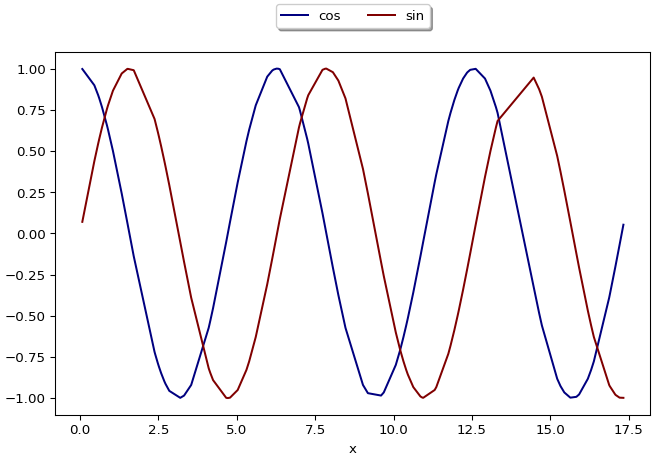

In [3]:
%%node
var data = [];
for (var i = 0; i < 1000; i++) {
    var x = 2*Math.PI * i/ 360;
    var obj = {
      x: x,
      i: i,
      sin: Math.sin(x),
      cos: Math.cos(x),
      tan: Math.tan(x)
    };
    data.push(obj);
}
display(data);

In [5]:
npm.install('request');

/QOpenSys/pkgs/bin/npm install -s request
+ request@2.88.0
added 48 packages from 59 contributors and audited 63 packages in 6.766s
found 0 vulnerabilities


#Create a function to get the current position of the International Space Station in one notebook cell:

In [7]:
%%node
var request = require('request');
var getPosition = function(callback) {
    var r = {
        method:'GET',
        url: 'http://api.open-notify.org/iss-now.json',
        json: true
    };
    request(r, function(err, req, body) {
        var obj = null;
        if (!err) {
            obj = body.iss_position
            obj.latitude = parseFloat(obj.latitude);
            obj.longitude = parseFloat(obj.longitude);
            obj.time = new Date().getTime();       
        }
        callback(err, obj);
    });
};

... ..... ..... ..... ..... ... ..... ..... ....... ....... ....... ....... ....... ..... ..... ...


#And use it in following cell:

In [8]:
%%node
getPosition(function(err, data) {
    print(data);
});

... ...
{"latitude": 38.5782, "longitude": -164.229, "time": 1574338493306}


#The same as above using "Promise"

In [10]:
npm.install('request-promise');

/QOpenSys/pkgs/bin/npm install -s request-promise
+ request-promise@4.2.5
added 5 packages from 4 contributors and audited 196 packages in 5.038s
found 0 vulnerabilities


In [36]:
npm.install('moment')

/QOpenSys/pkgs/bin/npm install -s moment
+ moment@2.24.0
added 1 package from 6 contributors and audited 202 packages in 3.453s
found 0 vulnerabilities


In [2]:
%%node
var request = require('request-promise');
var moment = require('moment');
var getPosition = function(callback) {
    var r = {
        method:'GET',
        url: 'http://api.open-notify.org/iss-now.json',
        json: true
    };
    return request(r).then(function(body) {
        var obj = null;
        obj = body.iss_position
        obj.latitude = parseFloat(obj.latitude);
        obj.longitude = parseFloat(obj.longitude);
        obj.time = moment(new Date().getTime()).format("DD-MM-YYYY HH:mm:ss");         
        return obj;
    });
};

... ..... ..... ..... ..... ... ..... ..... ..... ..... ..... ..... ..... ...


In [3]:
%%node
getPosition().then(function(data) {
  print(data);
});

... ...
{"latitude": 14.6531, "longitude": -0.3601, "time": "02-12-2019 13:22:04"}


Display ISS position on the map.
Restart kernel before running the code bellow.

In [1]:
import pixiedust_node

Pixiedust database opened successfully


In [5]:
npm.install('node-pandas')

/QOpenSys/pkgs/bin/npm install -s node-pandas
+ node-pandas@1.0.5
added 1 package from 1 contributor and audited 308 packages in 4.051s
found 0 vulnerabilities


In [2]:
%%node
var request = require('request-promise');
var moment = require('moment');
var pd = require('node-pandas');
var getPosition = function(callback) {
    var r = {
        method:'GET',
        url: 'http://api.open-notify.org/iss-now.json',
        json: true
    };
    return request(r).then(function(body) {
        var obj = null;
        obj = body.iss_position
        obj.latitude = parseFloat(obj.latitude);
        obj.longitude = parseFloat(obj.longitude);
        obj.time = moment(new Date().getTime()).format("DD-MM-YYYY HH:mm:ss");
        df = pd.DataFrame([{latitude:obj.latitude, longitude:obj.longitude, time:obj.time, np:500}]);
        return df;
    });
};

... ..... ..... ..... ..... ... ..... ..... ..... ..... ..... ..... ..... ..... ...


In [3]:
%%node
getPosition().then(display)

In [3]:
pip install geos

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install shapely

  Using cached https://files.pythonhosted.org/packages/a2/fb/7a7af9ef7a35d16fa23b127abee272cfc483ca89029b73e92e93cdf36e6b/Shapely-1.6.4.post2.tar.gz
    ERROR: Command errored out with exit status 1:
     command: /QOpenSys/pkgs/bin/python3 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-u_ex92qe/shapely/setup.py'"'"'; __file__='"'"'/tmp/pip-install-u_ex92qe/shapely/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-install-u_ex92qe/shapely/pip-egg-info
         cwd: /tmp/pip-install-u_ex92qe/shapely/
    Complete output (11 lines):
    Failed `CDLL(libgeos_c.so.1)`
    Failed `CDLL(libgeos_c.so)`
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-u_ex92qe/shapely/setup.py", line 80, in <module>
        from shapely._buildcfg import geos_version_strin

In [1]:
pip install --user git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-7566rgja
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-7566rgja
     |################################| 225kB 2.8MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /QOpenSys/pkgs/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-req-build-7566rgja/setup.py'"'"'; __file__='"'"'/tmp/pip-req-build-7566rgja/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-kr5f3hca --python-tag cp36
       cwd: /tmp/pip-req-build-7566rgja/
  Complete output (1193 lines):
  checking for GEOS lib in /home/CZ50247 ....
  checking for GEOS lib in /home/CZ50247/local ....
  checking for GEOS lib in /usr ....
  checking for GEOS lib in /usr/local ....
  GEOS lib (version 3.8.0) found i

       (void)(GEOSCoordSeq_setX(__pyx_v_cs, __pyx_v_i, __pyx_v_dx));
                                ^~~~~~~~~~
  In file included from src/_geoslib.c:566:0:
  /usr/local/include/geos_c.h:1406:21: note: expected 'GEOSCoordSequence * {aka struct GEOSCoordSeq_t *}' but argument is of type 'GEOSCoordSequence ** {aka struct GEOSCoordSeq_t **}'
   extern int GEOS_DLL GEOSCoordSeq_setX(GEOSCoordSequence* s,
                       ^~~~~~~~~~~~~~~~~
  src/_geoslib.c:4455:30: warning: passing argument 1 of 'GEOSCoordSeq_setY' from incompatible pointer type [-Wincompatible-pointer-types]
       (void)(GEOSCoordSeq_setY(__pyx_v_cs, __pyx_v_i, __pyx_v_dy));
                                ^~~~~~~~~~
  In file included from src/_geoslib.c:566:0:
  /usr/local/include/geos_c.h:1408:21: note: expected 'GEOSCoordSequence * {aka struct GEOSCoordSeq_t *}' but argument is of type 'GEOSCoordSequence ** {aka struct GEOSCoordSeq_t **}'
   extern int GEOS_DLL GEOSCoordSeq_setY(GEOSCoordSequence* s,
          

  ld: 0711-317 ERROR: Undefined symbol: geos::geom::Geometry::within(geos::geom::Geometry const*) const
  ld: 0711-317 ERROR: Undefined symbol: geos::geom::Geometry::contains(geos::geom::Geometry const*) const
  ld: 0711-317 ERROR: Undefined symbol: geos::geom::Geometry::overlaps(geos::geom::Geometry const*) const
  ld: 0711-317 ERROR: Undefined symbol: geos::geom::Geometry::equals(geos::geom::Geometry const*) const
  ld: 0711-317 ERROR: Undefined symbol: geos::geom::Geometry::toString[abi:cxx11]() const
  ld: 0711-317 ERROR: Undefined symbol: geos::geom::Geometry::toText[abi:cxx11]() const
  ld: 0711-317 ERROR: Undefined symbol: geos::geom::Geometry::convexHull() const
  ld: 0711-317 ERROR: Undefined symbol: geos::geom::LineString::reverse() const
  ld: 0711-317 ERROR: Undefined symbol: geos::geom::LineString::equalsExact(geos::geom::Geometry const*, double) const
  ld: 0711-317 ERROR: Undefined symbol: geos::geom::LineString::apply_rw(geos::geom::CoordinateFilter const*)
  ld: 0711-3

  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=46254 sha256=04920a833cb84fe40b4fa74ec3f4043497c2fda8c5b6b36dde57eea43d3d72a2
  Stored in directory: /home/CZ50247/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
Failed to build basemap
    Running setup.py install for basemap ... error
    ERROR: Command errored out with exit status 1:
     command: /QOpenSys/pkgs/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-req-build-7566rgja/setup.py'"'"'; __file__='"'"'/tmp/pip-req-build-7566rgja/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-48hekwqb/install-record.txt --single-version-externally-managed --compile --user --prefix=
         cwd: /tmp/pip-req-build-7566rgja/
    Complete output (1193 lines):
    checking for GEOS l

       GEOSGeom_destroy(__pyx_v_g3);
                        ^~~~~~~~~~
    In file included from src/_geoslib.c:566:0:
    /usr/local/include/geos_c.h:1582:22: note: expected 'GEOSGeometry * {aka struct GEOSGeom_t *}' but argument is of type 'GEOSGeometry ** {aka struct GEOSGeom_t **}'
     extern void GEOS_DLL GEOSGeom_destroy(GEOSGeometry* g);
                          ^~~~~~~~~~~~~~~~
    src/_geoslib.c: In function '__pyx_pf_8_geoslib_12BaseGeometry_8simplify':
    src/_geoslib.c:2276:29: warning: passing argument 1 of 'GEOSSimplify' from incompatible pointer type [-Wincompatible-pointer-types]
       __pyx_v_g3 = GEOSSimplify(__pyx_v_g1, __pyx_v_tolerance);
                                 ^~~~~~~~~~
    In file included from src/_geoslib.c:566:0:
    /usr/local/include/geos_c.h:1669:31: note: expected 'const GEOSGeometry * {aka const struct GEOSGeom_t *}' but argument is of type 'GEOSGeometry ** {aka struct GEOSGeom_t **}'
     extern GEOSGeometry GEOS_DLL *GEOSSimplify(const GE

    ld: 0711-317 ERROR: Undefined symbol: .geos::operation::relate::RelateOp::relate(geos::geom::Geometry const*, geos::geom::Geometry const*, geos::algorithm::BoundaryNodeRule const&)
    ld: 0711-317 ERROR: Undefined symbol: .geos::algorithm::BoundaryNodeRule::getBoundaryRuleMod2()
    ld: 0711-317 ERROR: Undefined symbol: .geos::algorithm::BoundaryNodeRule::getBoundaryMultivalentEndPoint()
    ld: 0711-317 ERROR: Undefined symbol: .geos::algorithm::BoundaryNodeRule::getBoundaryEndPoint()
    ld: 0711-317 ERROR: Undefined symbol: vtable for __cxxabiv1::__class_type_info
    ld: 0711-317 ERROR: Undefined symbol: .geos::operation::valid::IsValidOp::getValidationError()
    ld: 0711-317 ERROR: Undefined symbol: .geos::operation::valid::TopologyValidationError::toString[abi:cxx11]()
    ld: 0711-317 ERROR: Undefined symbol: .geos::operation::valid::TopologyValidationError::getCoordinate()
    ld: 0711-317 ERROR: Undefined symbol: .geos::geom::GeometryFactory::createPoint(geos::geom::Coor

    ld: 0711-317 ERROR: Undefined symbol: .geos::operation::sharedpaths::SharedPathsOp::clearEdges(std::vector<geos::geom::LineString*, std::allocator<geos::geom::LineString*> >&)
    ld: 0711-317 ERROR: Undefined symbol: .geos::util::Interrupt::registerCallback(void (*)())
    ld: 0711-317 ERROR: Undefined symbol: .geos::util::Interrupt::request()
    ld: 0711-345 Use the -bloadmap or -bnoquiet option to obtain more information.
    collect2: error: ld returned 8 exit status
    error: Command "/QOpenSys/pkgs/lib/python3.6/config-3.6m/ld_so_aix gcc -pthread -bI:/QOpenSys/pkgs/lib/python3.6/config-3.6m/python.exp -Wl,-blibpath:/QOpenSys/pkgs/lib:/QOpenSys/usr/lib build/temp.os400-powerpc64-3.6/src/_geoslib.o -L/usr/local/lib -L/usr/local/lib64 -L/QOpenSys/pkgs/lib -Wl,-R/usr/local/lib -Wl,-R/usr/local/lib64 -lgeos_c -o build/lib.os400-powerpc64-3.6/_geoslib.so" failed with exit status 1
    ----------------------------------------
ERROR: Command errored out with exit status 1: /QOpenSy

In [1]:
pip install keplergl

  Using cached https://files.pythonhosted.org/packages/e6/2f/27093b60328cc13a1f71aed25ee9f63c0a2094efd931a7275da33b297975/keplergl-0.1.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/9c/d1/8d5bd662703cc1764d986f6908a608777305946fa634d34c470cd4a1e729/traittypes-0.2.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5b/0c/e6c99e561b03482220f00443f610ccf4dce9b50f4b1093d735f93c6fc8c6/geopandas-0.6.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b7/93/b544dd08092b457d88e10fc1e0989d9397fd32ca936fdfcbb2584178dd2b/pandas-0.25.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/a2/fb/7a7af9ef7a35d16fa23b127abee272cfc483ca89029b73e92e93cdf36e6b/Shapely-1.6.4.post2.tar.gz
    ERROR: Command errored out with exit status 1:
     command: /QOpenSys/pkgs/bin/python3 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-7os7t5ey/Shapely/setup.py'"'"'; __file__='"'"'/tmp/pip-install-7os7t5ey/Shapely

In [55]:
map = Basemap(projection='ortho', lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua') 
map.fillcontinents(color='coral', lake_color='aqua') 
map.drawcoastlines()

x, y = map(0, 0)

map.plot(x, y, marker='D',color='m')

plt.show()

NameError: name 'Basemap' is not defined

In [9]:
npm.install('react')

/QOpenSys/pkgs/bin/npm install -s react
+ react@16.12.0
added 6 packages from 3 contributors and audited 211 packages in 3.721s
found 0 vulnerabilities


In [14]:
%%node
var React = require('react');
var KeplerGl = require('kepler.gl');

var map = KeplerGl(height=600, width=800)
map

Thrown:
{ Error: Cannot find module 'react'
at Function.Module._resolveFilename (internal/modules/cjs/loader.js:636:15)
at Function.Module._load (internal/modules/cjs/loader.js:562:25)
at Module.require (internal/modules/cjs/loader.js:692:17)
at require (internal/modules/cjs/helpers.js:25:18) code: 'MODULE_NOT_FOUND' }
Thrown:
TypeError: KeplerGl is not a function
